####Importamos las librerias a usar

In [1]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 5.2 MB/s 
     |████████████████████████████████| 9.8 MB 39.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [2]:
import time
import datetime
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_absolute_error
from pmdarima.arima import auto_arima

####Definimos las propiedades de nuestro plot y el escalamiento

In [ ]:
#Configuracion de figuras

plt.style.use('fivethirtyeight')
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 20,10

In [ ]:
#Normalizamos la data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

####Obtenemos la data de Microsoft (MFST)

In [3]:
#Seleccionamos la empresa de la que tomaremos los datos
ticker='MSFT'

#Seleccionamos el periodo de tiempo
period1 = int(time.mktime(datetime.datetime(2015, 1, 1, 0, 0).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d'
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'
df_msft = pd.read_csv(query_string)

In [4]:
df_msft

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,46.660000,47.419998,46.540001,46.759998,40.926445,27913900
1,2015-01-05,46.369999,46.730000,46.250000,46.330002,40.550095,39673900
2,2015-01-06,46.380001,46.750000,45.540001,45.650002,39.954929,36447900
3,2015-01-07,45.980000,46.459999,45.490002,46.230000,40.462566,29114100
4,2015-01-08,46.750000,47.750000,46.720001,47.590000,41.652905,29645200
...,...,...,...,...,...,...,...
1920,2022-08-18,290.190002,291.910004,289.079987,290.170013,290.170013,17186200
1921,2022-08-19,288.899994,289.250000,285.559998,286.149994,286.149994,20557200
1922,2022-08-22,282.079987,282.459991,277.220001,277.750000,277.750000,25061100
1923,2022-08-23,276.440002,278.859985,275.399994,276.440002,276.440002,17527400


In [ ]:
#Pasamos a que nuestra primera columna de indices sean las fechas

df_msft['Date'] = pd.to_datetime(df_msft.Date, format='%Y-%m-%d')
df_msft.index = df_msft['Date']

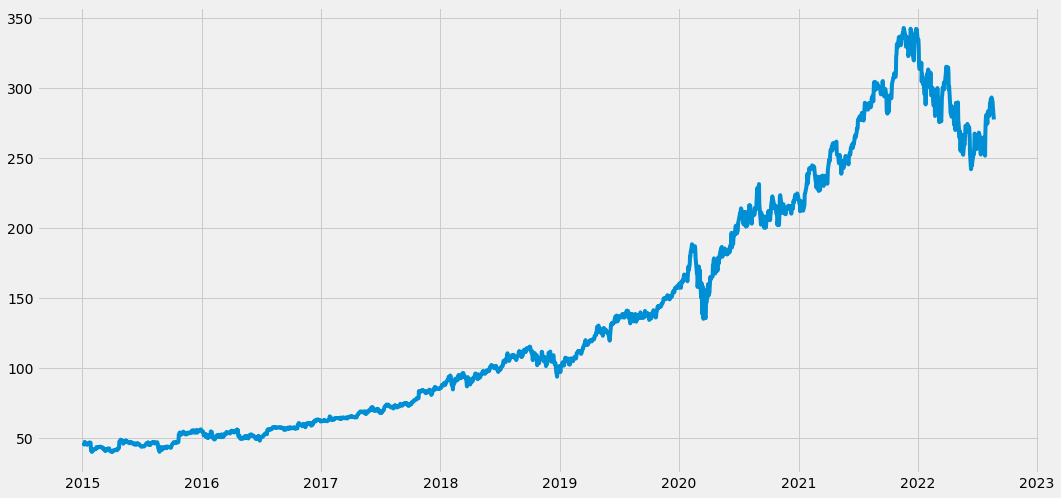

In [ ]:
#Mostramos nuestra variable que será la objetivo, en este caso el precio de cierre

plt.figure(figsize=(16,8))
plt.plot(df_msft['Close'], label='Precio de cierre MSFT')

In [ ]:
#Creamos un nuevo dataframe con la columna fecha y nuestra variable objetivo

data = df_msft.sort_index(ascending=True, axis = 0)
data

,Date,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2015-01-02,2015-01-02,46.660000,47.419998,46.540001,46.759998,40.926456,27913900
2015-01-05,2015-01-05,46.369999,46.730000,46.250000,46.330002,40.550091,39673900
2015-01-06,2015-01-06,46.380001,46.750000,45.540001,45.650002,39.954926,36447900
2015-01-07,2015-01-07,45.980000,46.459999,45.490002,46.230000,40.462563,29114100
2015-01-08,2015-01-08,46.750000,47.750000,46.720001,47.590000,41.652897,29645200
...,...,...,...,...,...,...,...
2022-08-16,2022-08-16,291.989990,294.040009,290.420013,292.709991,292.089996,18102900
2022-08-17,2022-08-17,289.739990,293.350006,289.470001,291.320007,291.320007,18253400
2022-08-18,2022-08-18,290.190002,291.910004,289.079987,290.170013,290.170013,17186200


In [ ]:
nueva_data = pd.DataFrame(index=range(0, len(df_msft)), columns=['Date','Close'])

In [ ]:
for i in range(0, len(data)):
  nueva_data['Date'][i] = data['Date'][i]
  nueva_data['Close'][i] = data['Close'][i]

In [ ]:
nueva_data.head()

,Date,Close
0,2015-01-02 00:00:00,46.759998
1,2015-01-05 00:00:00,46.330002
2,2015-01-06 00:00:00,45.650002
3,2015-01-07 00:00:00,46.23
4,2015-01-08 00:00:00,47.59


####Seleccionamos nuestra data de entrenamiento y validación y entrenamos el modelo

In [ ]:
new_data.iloc

In [ ]:
train = nueva_data[:1346]
training = train['Close']
training

0        46.759998
1        46.330002
2        45.650002
3            46.23
4            47.59
           ...    
1341    174.570007
1342    178.839996
1343    180.759995
1344    182.539993
1345    183.600006
Name: Close, Length: 1346, dtype: object

In [ ]:
valid = nueva_data[1346:]
validation = valid['Close']
validation

1346    184.679993
1347    186.740005
1348    182.509995
1349        179.75
1350    180.529999
           ...    
1918    292.709991
1919    291.320007
1920    290.170013
1921    286.149994
1922        277.75
Name: Close, Length: 577, dtype: object

In [ ]:
nueva_data.shape, training.shape, validation.shape

((1923, 2), (1346,), (577,))

In [ ]:
data = df_msft.sort_index(ascending=True, axis = 0)

train = data[:1346]
valid = data[1346:]

In [ ]:
training = train['Close']
validation = valid['Close']

(1346,)

In [ ]:
model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=351)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.36 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6354.795, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5954.513, Time=0.54 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.44 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6233.671, Time=0.11 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5777.508, Time=1.19 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.32 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.43 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5935.736, Time=0.90 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5779.185, Time=1.87 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5779.305, Time=2.96 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5801.506, Time=1.25 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5777.843, Time=4.68 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=5779.248, Time=5.59 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
forecast

,Prediction
Date,
2020-05-08,NaN
2020-05-11,NaN
2020-05-12,NaN
2020-05-13,NaN
2020-05-14,NaN
...,...
2022-08-16,NaN
2022-08-17,NaN
2022-08-18,NaN


In [ ]:
#data = df_dis.sort_index(ascending=True, axis=0)

train = data[:1346]
valid = data[1346:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=351)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.43 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6354.795, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=5954.513, Time=0.58 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6233.671, Time=0.12 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=5777.508, Time=1.28 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=6.22 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.51 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=5935.736, Time=0.99 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=5779.185, Time=2.91 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=5779.305, Time=1.93 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=5801.506, Time=1.36 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=5777.843, Time=4.74 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=5779.248, Time=5.12 sec

Best model:  ARIMA(1,1,0)(2,1,0)[12]  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,


In [ ]:
forecast

,Prediction
Date,
2020-05-08,NaN
2020-05-11,NaN
2020-05-12,NaN
2020-05-13,NaN
2020-05-14,NaN
...,...
2022-08-16,NaN
2022-08-17,NaN
2022-08-18,NaN


####Calculamos el RMSE

In [ ]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

nan

####Visualizamos el plot

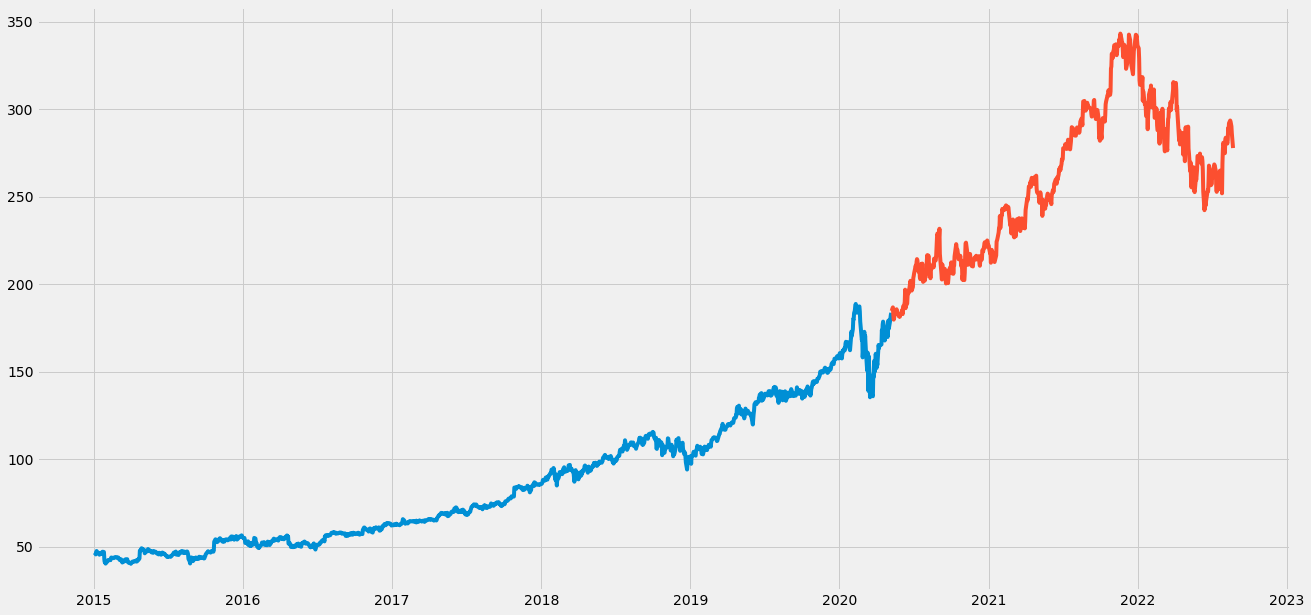

In [ ]:
plt.plot(train['Close'])
plt.plot(valid['Close'])
plt.plot(forecast['Prediction'])